# Blog Post - Spotify Song Spitter

###Group Members:
Andrew Holmes, Avery Le, Tor Weiland, J.P. Pacheaco

##Project Idea:
  - Given a user's playlist of liked and disliked song, we used the Spotify API and Machine Learning to recommend similar songs to the user "music taste"

##Project Description:

- This project had us use the Spotify Web API to get the necessary data from the top 1000 streamed artists on Spotify, as well as a specific user's playlist. Spotify has access to songs that a user likes and songs that they dislike; neither of this data is available via the web API so to get around this we manually created and uploaded a playlist of songs we like and songs that we dislike. 
- Spotify's API gives song features that we can use to determine/define similarity. The features include: danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration (measured in ms). 
- By clustering songs based on these features plus a few more that we will add later, we can find the most similar songs, then using the known songs that a user likes and dislikes we can classify which clusters include more liked than disliked songs and recommend those back to the user.

##Why Recommend Songs?
- We thought this would be an interesting project to take on because it is so relevant in most people's lives. Most people use some sort of music streaming app, whether it is Spotify or Apple Music. All platforms are constantly learning your music taste and recommending songs that you might like, thus it seemed like a cool project to see how well we can replicate this with what we learned in this class. 
- We were also curious as to how the Spotify app is recommending music to people, create our own model and see how well it works.
- We know Spotify keeps track of songs a user dislikes, however this information is not public, so we wanted to demonstrate that within our model. By having the user input a "dislike" playslist, we can level the playing field and recommend songs that take this into consideration. 

##Spotify Web API

In order to use the Spotify Web API, you must first go through Spotify's Web Developers website and gain authorization and client credentials. With these credentials, you can start using the API using a program called Spotipy:


In [ ]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 138 kB 32.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id='07be45c34c5f46e1912d2c751abe2b58', client_secret='01d6ce4e273846a99db1fc668525e10c')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

#sp is the spotify object 

The Spotipy object gives us access to the Web API and is what allowed us to pull the data of the top 1000 artists and all their songs. We used a function that got all the songs and song features from a certain artist and created a dataframe from it. After running this function on the 1000 artist names that we pulled from Chartmaster's Top 1000 Streamed Artist list we found online, we ended up with **~332,000** songs. 


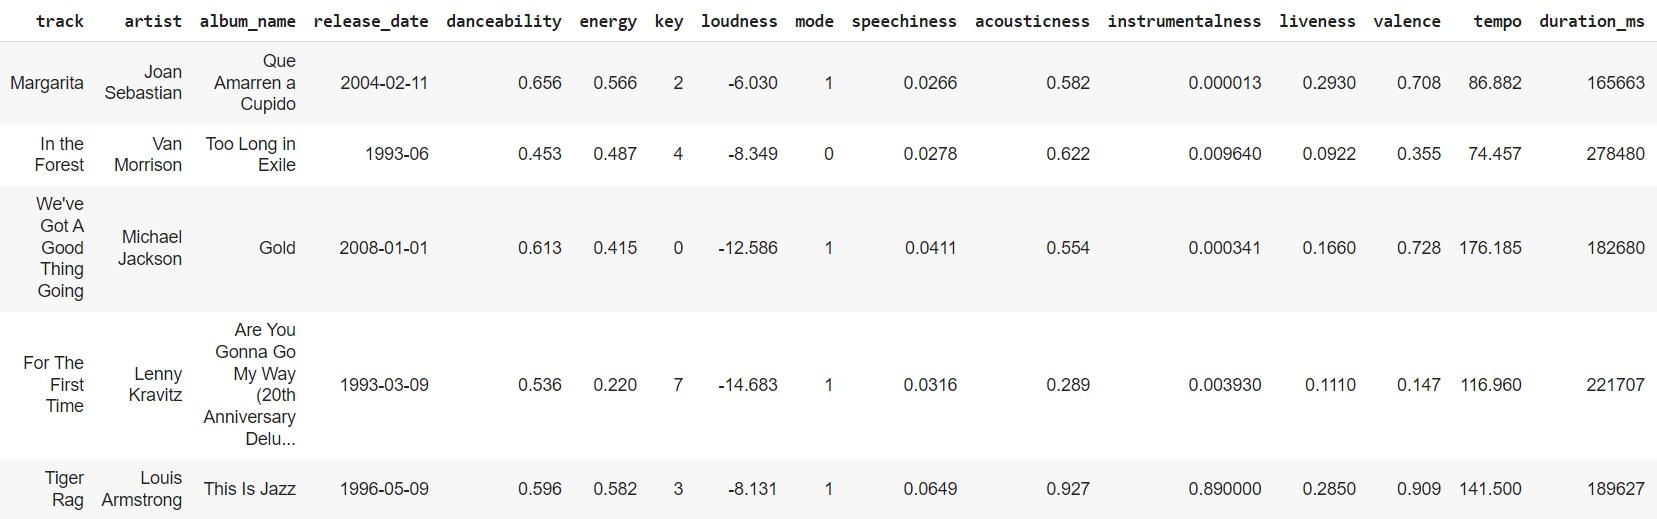
  - Sample of *all_songs* and the features included

After looking through the full set of songs, we noticed that there were a few duplicates and roughly 10% of the entire dataframe were all lullabies from *Baby Lullaby Academy*. We decided that these songs were not songs that should be recommended to our target audience and decided to remove duplicates and remove all songs from *Baby Lullaby Academy*. The dataset was too large and too data filled for us to go through each song/artist and determine if it should stay or not, so we kept all other songs. This resulted in a dataset of just **~270,000** songs.

The Spotipy object was used to also get information about the songs in the self created **liked** and **disliked** songs playlist. There is a function within our supporting notebook that was able to take a playlist URL and get each song within that playlist.

- good = 'https://open.spotify.com/playlist/0TX0ePppa6LPf6ZybYe67y?si=5768c86ecbc949f0'
- bad = 'https://open.spotify.com/playlist/4SfiNctj1P0XKSnDzVPPCZ?si=49269a65ad644d3f'

## Clean the Data

Now that all the data has been acquired, we can look through and determine which variables might be the most influential. We decided to train our model using the artist name, release year, and all the song features given by the API. In order to store the data nicely and in a useful way, we standardized all the numerical data and one hot encoded the categorical data such as artist name and release year.

In [ ]:
#To save web scraping every single time, we saved the dataframes into these csv files
import pandas as pd
playlist = pd.read_csv('https://sw.cs.wwu.edu/~len22/data311/playlist.csv').drop(columns = ['Unnamed: 0.1'])          #Dataframe of liked and disliked songs in the playlists
cleaned_df = pd.read_csv('https://sw.cs.wwu.edu/~len22/data311/all_songs.csv')                                     #Dataframe of all songs from the top 1000 artists

## Playlist Analysis

We first wanted to check out our playlist of known liked and disliked songs to see the clustering it has. To do so, we used the elbow method on the total distortion to determine how many clusters were in the data. This data appeared to be roughly 4-8 clusters so we went with 6 clusters. 

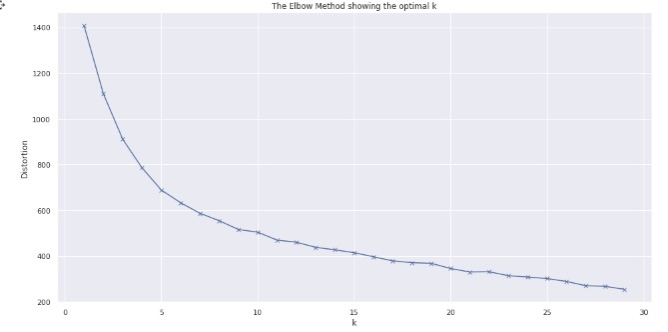

Next we wanted to see if our liked and disliked songs roughly appeared in different clusters, which we would use later to determine which clusters were good or bad songs. Looking at the following two scatterplots:

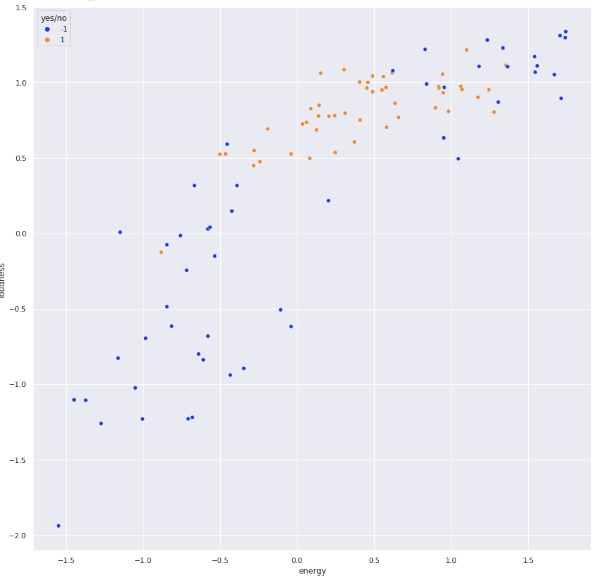

  - This scatterplot shows K-Means clustering on our playlist with the actual known liked songs and disliked songs as the hues for the colors. The orange cluster represents liked songs and the blue represents the cluster of bad songs. Since we have 955 columns of explanatory variables, we decided to just plot based off of two variables, energy and loudness. These two variables were largely influential in final recommendations so we feel confident that they offer simplified yet accurate depictions of our analysis.

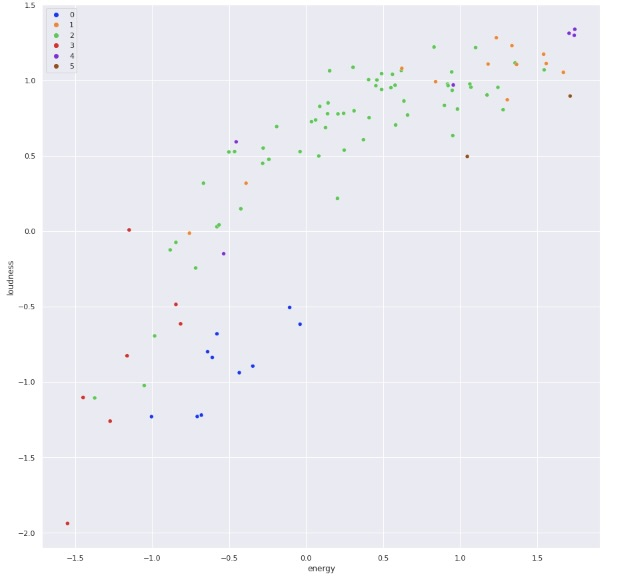

  - This scatterplot performed K-Means clustering as well, however this time we chose num_clusters to equal 6 from the elbow method above. Thus, the output shows 6 unique clusters within the data and we can see that the green cluster generally looks similar to the orange cluster from the above scatterplot. We decided that since most songs that we liked appeared in the green cluster,that this model was going to perform how we expected it to and how we wanted it to

## K-Means Cluster Model

Now that we have all the data we need, the playlist and the full set of songs. And we know that K-Means clustering can work for what we desire, we perform K-Means clustering on the full data set

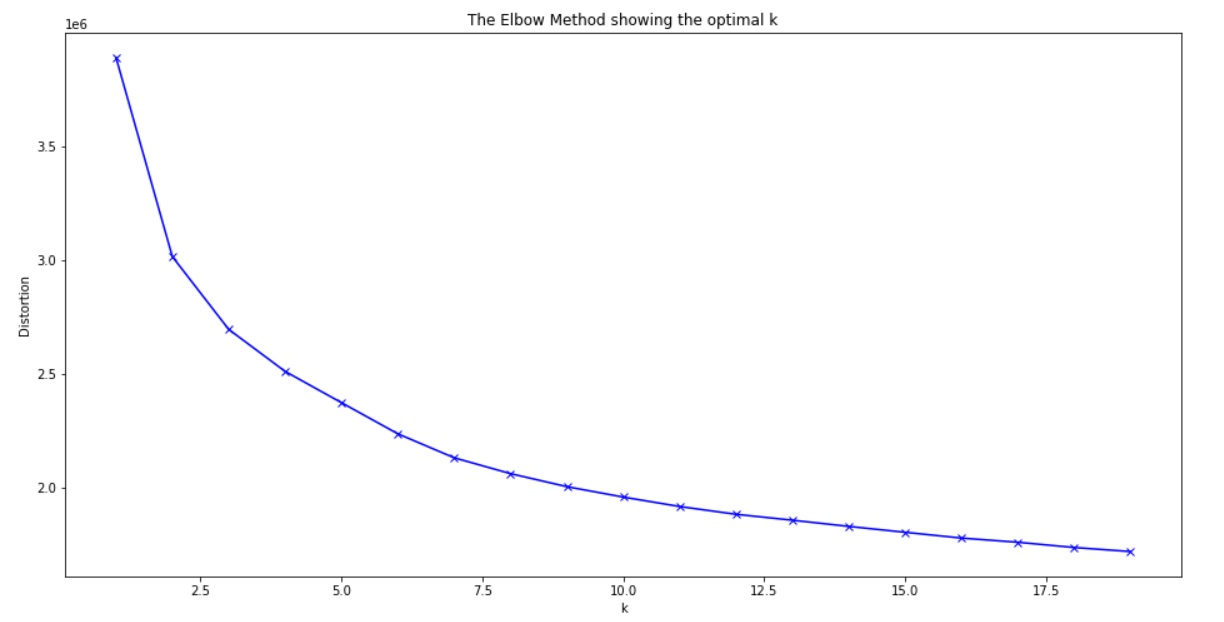

  - After performing the elbow method on the full data set, we can see that there are still roughly 6 clusters, therefore we will cluster the full set using num_clusters equaling to 6.

###Performance

In [ ]:
#Code for Clustering Model
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

K=6     # num clusters equals 6 from the elbow method
pred_data = MinMaxScaler().fit_transform(cleaned_df[cleaned_df.columns[3:]])
pred_kmeans = KMeans(init="k-means++", n_clusters=K, random_state=10).fit(pred_data)
cleaned_df['kmeans'] = pred_kmeans.labels_

After performing the K-Means clustering to the full dataset of all songs we can check each cluster and see which one has the most number of liked songs vs disliked songs. Then after selecting that cluster out as good songs, we can take a sample and recommend a song from that cluster

In order to test how well the model did we took a sample of songs from our recommended songs and saw that the cluster had a similar trend as our expected cluster of good songs from our playlist scatterplot. 

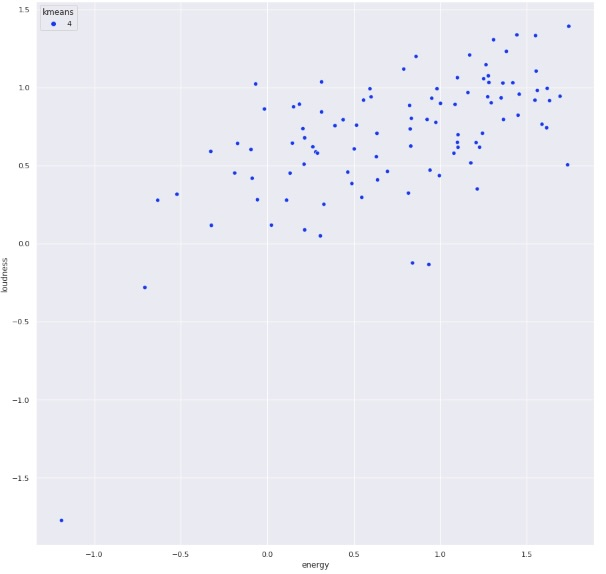

When we made our confusion matrix we had 44 true negatives, 8 false positives, 4 false negatives and 44 true positives. It had an accuracy of 88% with precision of 84.6%. Based on these metrics that we have looked at, our model does decently well.